<a href="https://colab.research.google.com/github/Alirezarahhmati/KaggleClaimFraudClassification/blob/Develop/FraudDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

###### Data analys

In [3]:
import pandas as pd

data = pd.read_csv('/content/fraud_oracle.csv')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


Check the summary statistics of the dataset

In [4]:
print(data.describe())

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000 

Check the class distribution (fraudulent vs. non-fraudulent)

In [5]:
print(data['FraudFound_P'].value_counts())

0    14497
1      923
Name: FraudFound_P, dtype: int64


the datas are so inbalance.

checking for missing value

In [6]:
# Check for missing values
print(data.isnull().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


This data do not have missed data.

###### count ploting of Fraud Report

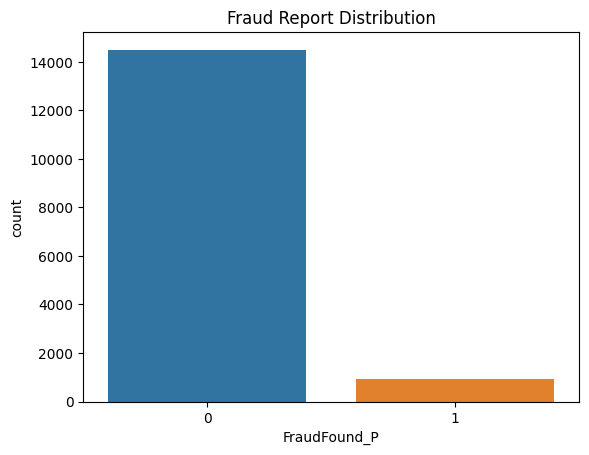

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of the target variable
sns.countplot(x='FraudFound_P', data=data)
plt.title('Fraud Report Distribution')
plt.show()

###### we can see again that our data are so inbalance

<ipython-input-8-fb41ded83ddf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


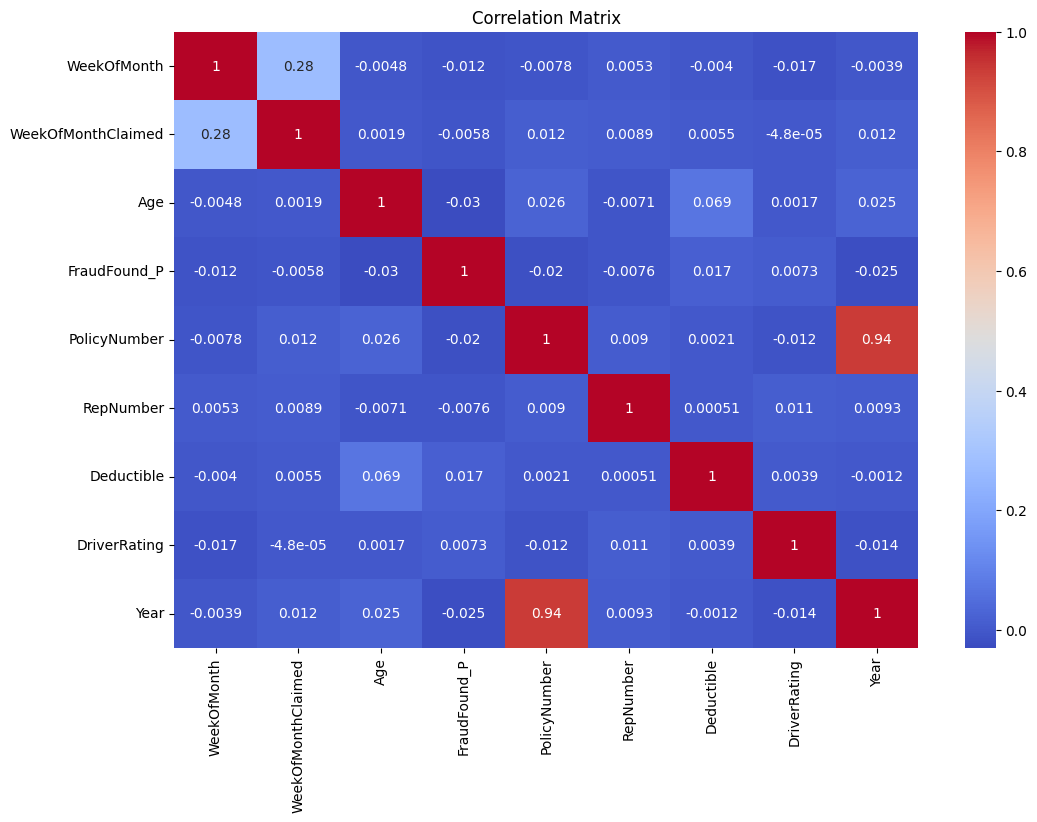

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###### Boxplot of continuous features.

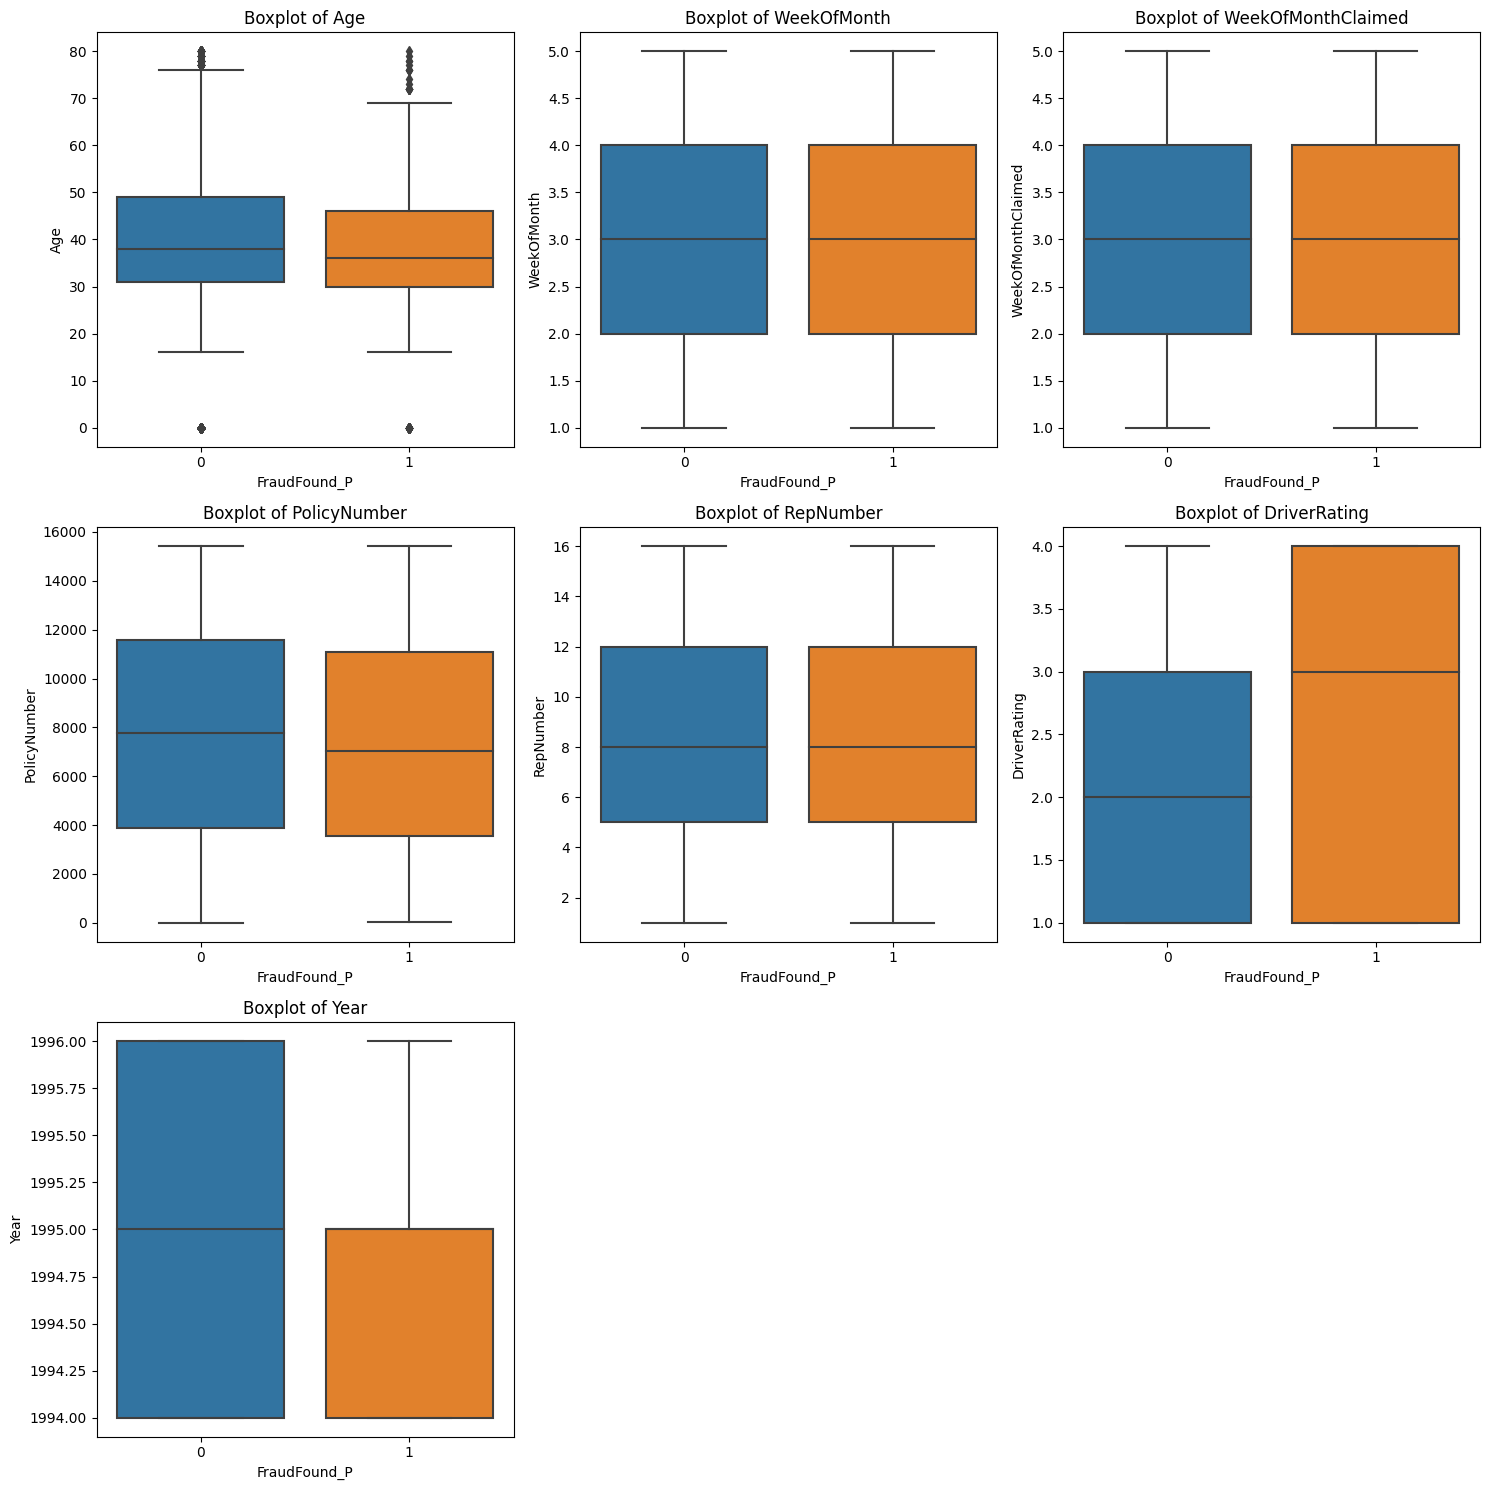

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of continuous features
continuous_cols = ['Age', 'WeekOfMonth', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber', 'DriverRating', 'Year']

# Calculate the number of rows and columns for subplots
num_plots = len(continuous_cols)
num_rows = int(num_plots/3) + num_plots%3
num_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over continuous columns and create subplots
for i, col in enumerate(continuous_cols):
    ax = axes[i]
    sns.boxplot(x='FraudFound_P', y=col, data=data, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

###### Histogram of categorical features

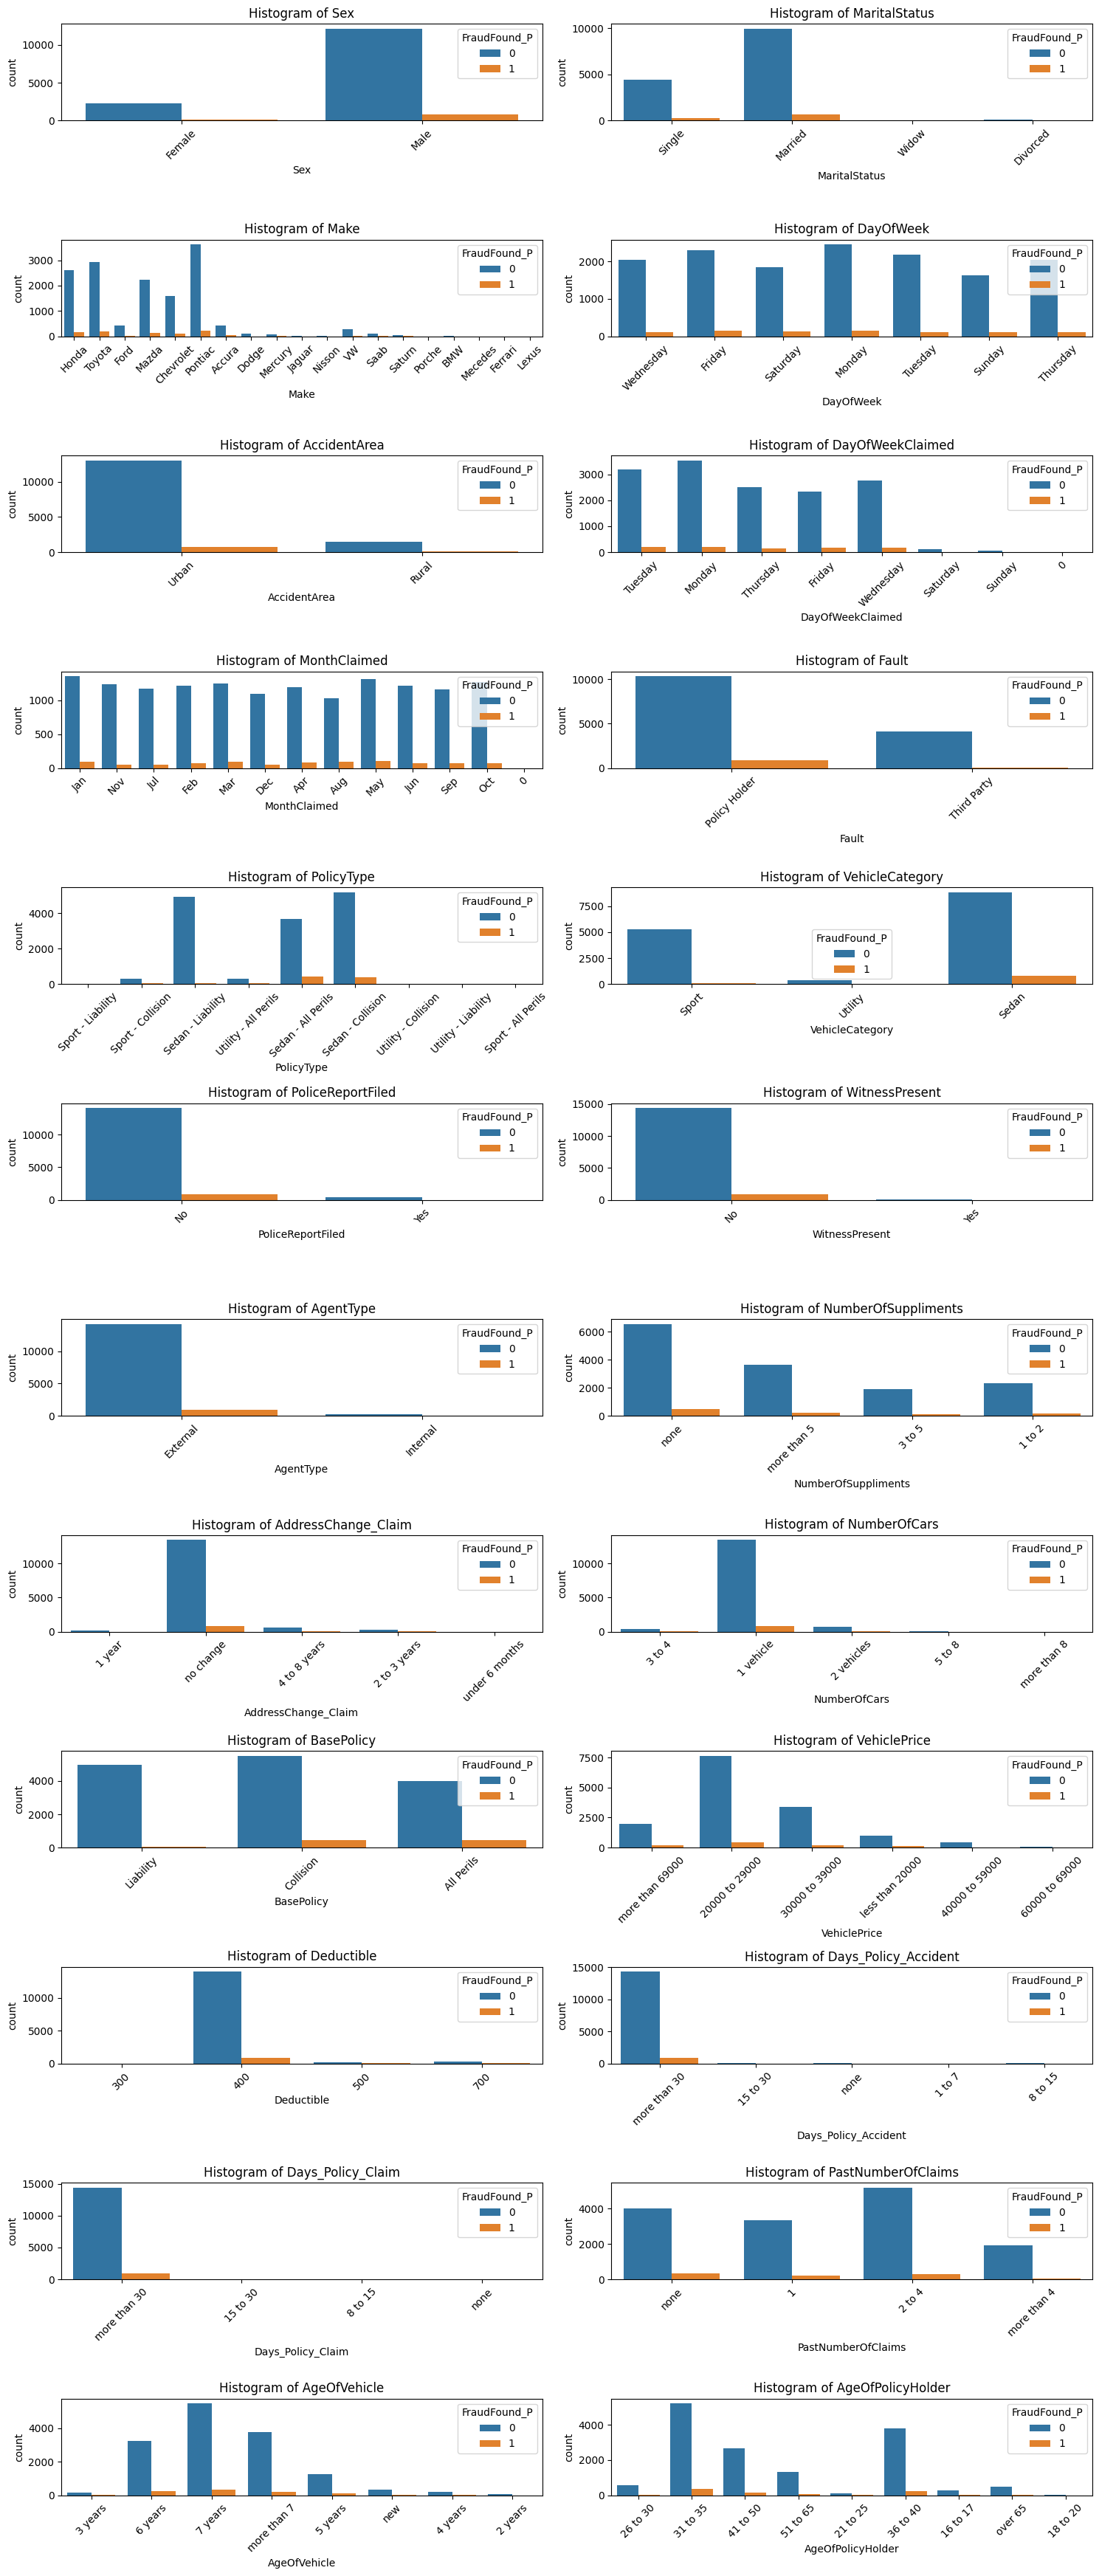

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of categorical features
categorical_cols = ['Sex', 'MaritalStatus', 'Make', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Fault', 'PolicyType',
                    'VehicleCategory', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
                    'NumberOfCars', 'BasePolicy', 'VehiclePrice', 'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
                    'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder']


# Calculate the number of rows and columns for subplots
num_plots = len(categorical_cols)
num_rows = int(num_plots/2) + num_plots%2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 35))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over categorical columns and create subplots
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=col, hue='FraudFound_P', data=data, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


###### Removing outliers

The ages feature has some outliers:
there is some zero age that i replace them with average of age



In [11]:
lower_threshold = 18

# Identify outliers
outliers = data[(data['Age'] < lower_threshold)]

print("Number of Outliers:", len(outliers))

# Calculate the median age of non-outliers
non_outliers_median = data[(data['Age'] >= lower_threshold)]['Age'].median()

# Replace outliers with the median age
data.loc[data['Age'] < lower_threshold, 'Age'] = non_outliers_median

Number of Outliers: 335


In [12]:
print('DayOfWeekClaimed', data['DayOfWeekClaimed'].unique())
print('MonthClaimed', data['MonthClaimed'].unique())

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


as can see DayOfWeekCalimed and MonthCalimed have some zero values.
Now we are going to remove them.

In [13]:
# Identify outliers
outliers = data[data['DayOfWeekClaimed'] == '0']

print("Number of Outliers:", len(outliers))

# Replace outliers with the median value
data.loc[data['DayOfWeekClaimed'] == '0', 'DayOfWeekClaimed'] = 'Saturday'

Number of Outliers: 1


In [14]:
# Identify outliers
outliers = data[data['MonthClaimed'] == '0']

print("Number of Outliers:", len(outliers))

# Replace outliers with the median value
data.loc[data['MonthClaimed'] == '0', 'MonthClaimed'] = 'Saturday'

Number of Outliers: 1


## Training the data with diffrent model

In [15]:
data = pd.get_dummies(data)

X = data.drop('FraudFound_P', axis=1)
y = data['FraudFound_P']

#### Impliment needed function : 

###### Impliment function for plot Confusion Matrix

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def plot_table(TN, FP, FN, TP):
  data = [
      [TN, FP, TN+FP],
      [FN, TP, FN+TP],
      [TN+FN, FP+TP, TN+FN+FP+TP]
  ]

  rows = ['No(true)', 'Yes(true)', 'Total']
  columns = ['No(pred)', 'Yes(pred)', 'Total']

  fig, ax = plt.subplots(figsize=(4, 2))
  ax.axis('off')
  ax.axis('tight')

  table = ax.table(cellText=data, rowLabels=rows, colLabels=columns, loc='center', cellLoc='center')

  table.auto_set_font_size(False)
  table.set_fontsize(12)
  table.scale(1.2, 1.2)

  plt.title('Confusion Matrix')
  plt.show()                     

###### Implementation for plot ROC

In [29]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


def plot_roc_curve(model, X, y):
  y_pred = model.predict_proba(X)[:, 1]
  fpr, tpr , _ = roc_curve(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--', label='Random')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characterist (ROC) curve')
  plt.legend(loc='lower right')
  plt.show()

### Logistic Regression :

#### Implementatin of Logistic Regression :

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score, roc_curve

def Logistic_Regresion(X_train, y_train, X_test, y_test):
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return accuracy, precision, recall, f1


#### Over Sampling :

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  ros = RandomOverSampler(random_state=42)
  X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Logistic_Regresion(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [32]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Logistic Regression : ', accuracy_av)
print('Average Precision for Logistic Regression : ', precision_av)
print('Average Recall for Logistic Regression : ', recall_av)
print('Average F1_score for Logistic Regression : ', F1_av)

Result after over sampling the data :
Average Accuracy for Logistic Regression :  0.6496108949416342
Average Precision for Logistic Regression :  0.12991179583959292
Average Recall for Logistic Regression :  0.8504441327723236
Average F1_score for Logistic Regression :  0.22535229075865099


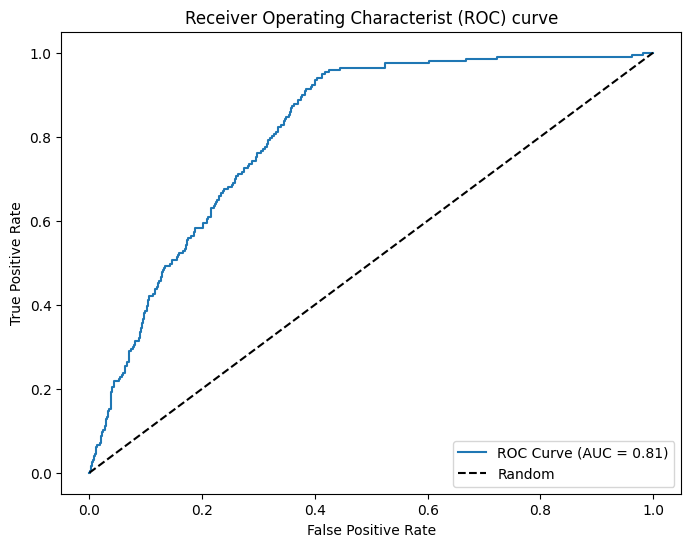

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### Under Sampling :

In [34]:
from imblearn.under_sampling import RandomUnderSampler

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  rus = RandomUnderSampler(random_state=42)
  X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Logistic_Regresion(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [35]:
accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after under sampling the data :')
print('Average Accuracy for Logistic Regression : ', accuracy_av)
print('Average Precision for Logistic Regression : ', precision_av)
print('Average Recall for Logistic Regression : ', recall_av)
print('Average F1_score for Logistic Regression : ', F1_av)

Result after under sampling the data :
Average Accuracy for Logistic Regression :  0.6543450064850844
Average Precision for Logistic Regression :  0.1292138266335648
Average Recall for Logistic Regression :  0.8310074801309023
Average F1_score for Logistic Regression :  0.22361107777329803


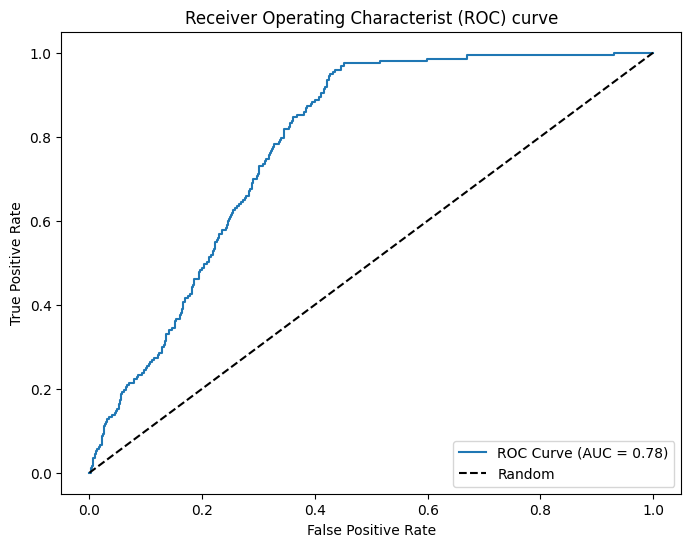

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### SMOTE : 

In [37]:
from imblearn.over_sampling import SMOTE

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  smote = SMOTE(random_state=42)
  X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Logistic_Regresion(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [38]:
accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after use SMOTE for oversampling :')
print('Average Accuracy for Logistic Regression : ', accuracy_av)
print('Average Precision for Logistic Regression : ', precision_av)
print('Average Recall for Logistic Regression : ', recall_av)
print('Average F1_score for Logistic Regression : ', F1_av)

Result after use SMOTE for oversampling :
Average Accuracy for Logistic Regression :  0.6668612191958496
Average Precision for Logistic Regression :  0.13308114824018746
Average Recall for Logistic Regression :  0.8266012155212715
Average F1_score for Logistic Regression :  0.2291933349973335


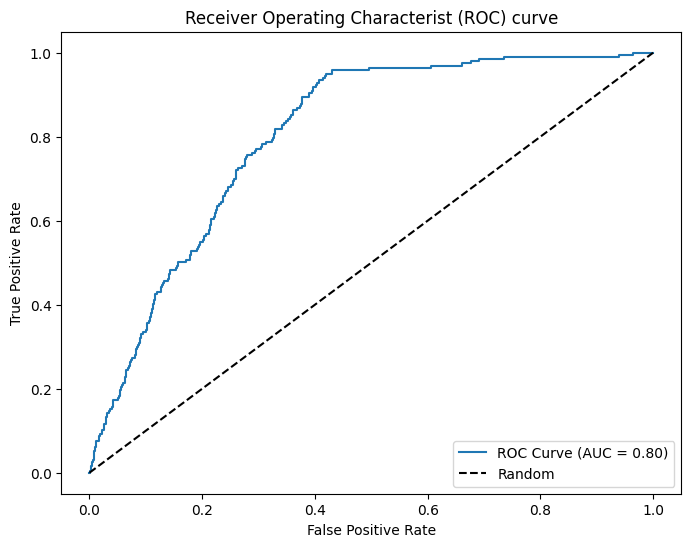

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

### SVM

###### Implementation of SVM : 

In [24]:
from sklearn.svm import SVC

def SVM(X_train, y_train, X_test, y_test):
  model = SVC(kernel='rbf', C=1.0, probability=True)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return accuracy, precision, recall, f1

#### Over Sampling : 

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 5

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  ros = RandomOverSampler(random_state=42)
  X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = SVM(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [27]:
accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after under sampling the data :')
print('Average Accuracy for SVM : ', accuracy_av)
print('Average Precision for SVM : ', precision_av)
print('Average Recall for SVM : ', recall_av)
print('Average F1_score for SVM : ', F1_av)

Result after under sampling the data :
Average Accuracy for SVM :  0.8799610894941634
Average Precision for SVM :  0.17934881598549005
Average Recall for SVM :  0.2806011775643012
Average F1_score for SVM :  0.2187202625102543


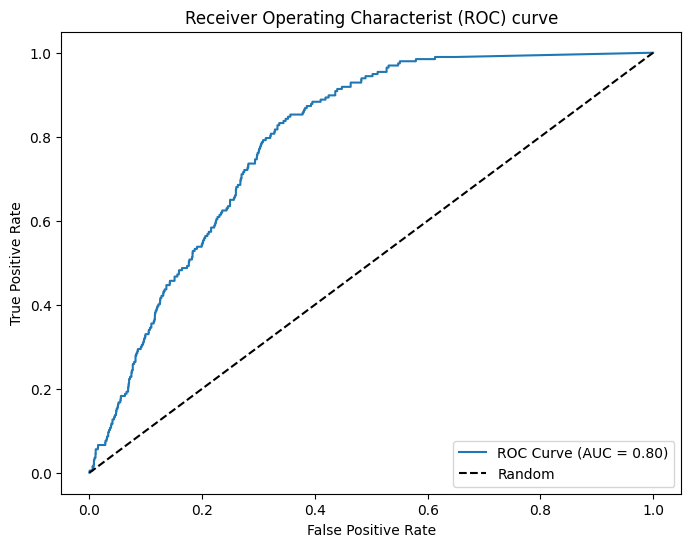

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
model = SVC(kernel='rbf', C=1.0, probability=True)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### Under Sampling : 

In [ ]:

n_folds = 5

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  rus = RandomUnderSampler(random_state=42)
  X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = SVM(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [ ]:
accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after under sampling the data :')
print('Average Accuracy for SVM : ', accuracy_av)
print('Average Precision for SVM : ', precision_av)
print('Average Recall for SVM : ', recall_av)
print('Average F1_score for SVM : ', F1_av)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
model = SVC(kernel='rbf', C=1.0, probability=True)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### SMOTE :

In [36]:
from imblearn.over_sampling import SMOTE

n_folds = 5

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  smote = SMOTE(random_state=42)
  X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = SVM(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [37]:
accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after under sampling the data :')
print('Average Accuracy for SVM : ', accuracy_av)
print('Average Precision for SVM : ', precision_av)
print('Average Recall for SVM : ', recall_av)
print('Average F1_score for SVM : ', F1_av)

Result after under sampling the data :
Average Accuracy for SVM :  0.9011024643320363
Average Precision for SVM :  0.20302490050462194
Average Recall for SVM :  0.22432432432432434
Average F1_score for SVM :  0.21276519304441335


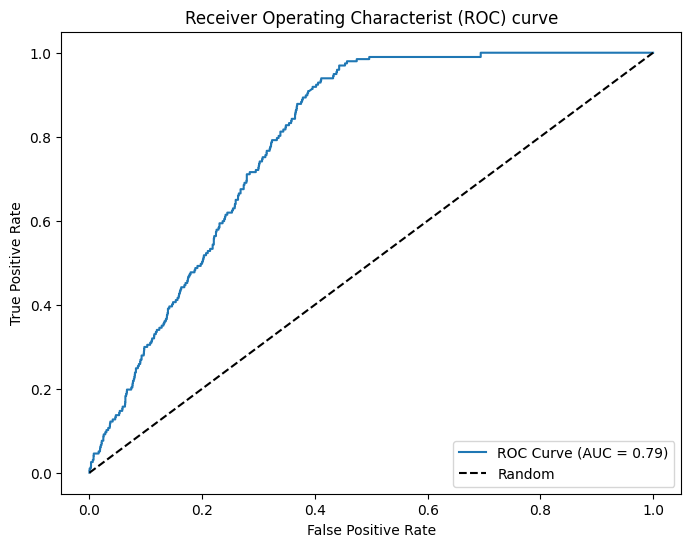

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
model = SVC(kernel='rbf', C=1.0, probability=True)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

### Decision Trees 

###### Implementation of Decision Tree :

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score, roc_curve

def Decision_Tree(X_train, y_train, X_test, y_test):
  model = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return accuracy, precision, recall, f1


#### Over Sampling : 

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  ros = RandomOverSampler(random_state=42)
  X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Decision_Tree(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [62]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Decisin Tree : ', accuracy_av)
print('Average Precision for Decisin Tree : ', precision_av)
print('Average Recall for Decisin Tree : ', recall_av)
print('Average F1_score for Decisin Tree : ', F1_av)

Result after over sampling the data :
Average Accuracy for Decisin Tree :  0.7190661478599221
Average Precision for Decisin Tree :  0.144664861209282
Average Recall for Decisin Tree :  0.7474988312295465
Average F1_score for Decisin Tree :  0.24230299288407897


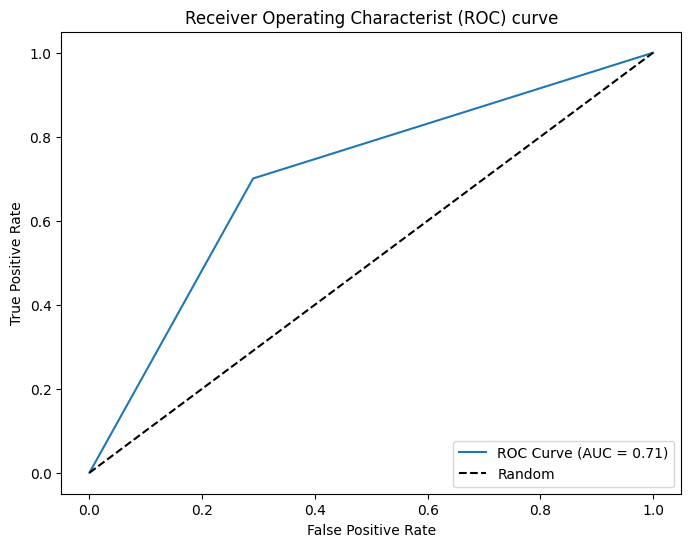

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
model = DecisionTreeClassifier(criterion='gini', max_depth=30, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

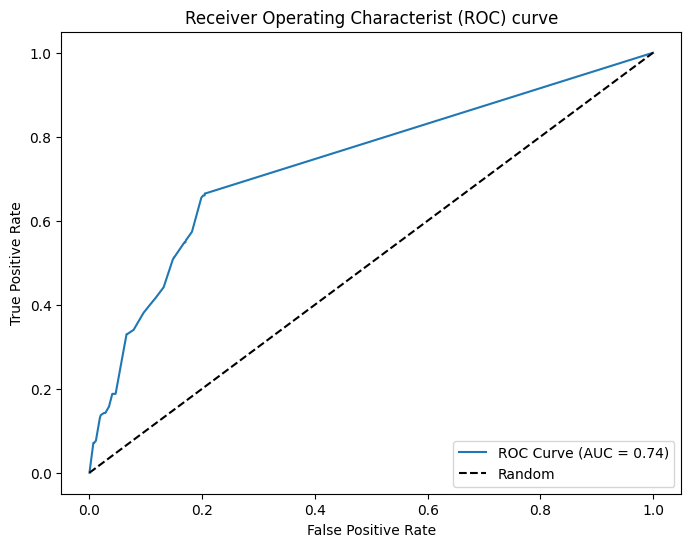

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
model = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### Under sampling : 

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  rus = RandomUnderSampler(random_state=42)
  X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Decision_Tree(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [65]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Decisin Tree : ', accuracy_av)
print('Average Precision for Decisin Tree : ', precision_av)
print('Average Recall for Decisin Tree : ', recall_av)
print('Average F1_score for Decisin Tree : ', F1_av)

Result after over sampling the data :
Average Accuracy for Decisin Tree :  0.7190661478599221
Average Precision for Decisin Tree :  0.144664861209282
Average Recall for Decisin Tree :  0.7474988312295465
Average F1_score for Decisin Tree :  0.24230299288407897


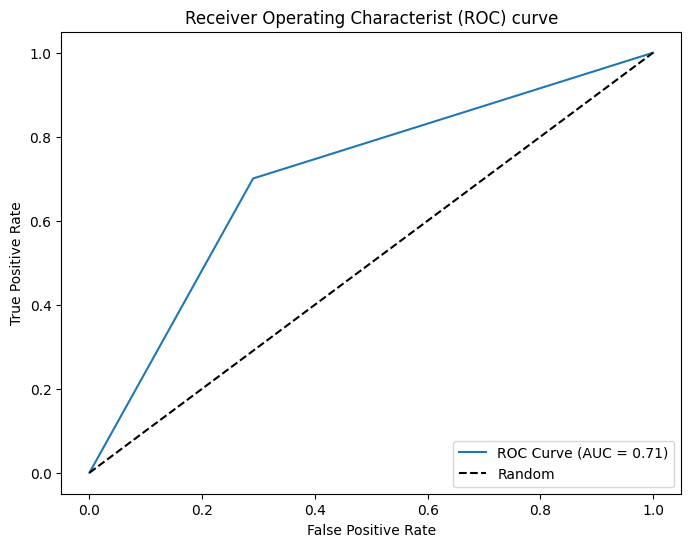

In [66]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
model = DecisionTreeClassifier(criterion='gini', max_depth=30, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### SMOTE : 

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  smote = SMOTE(random_state=42)
  X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Decision_Tree(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [68]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Decisin Tree : ', accuracy_av)
print('Average Precision for Decisin Tree : ', precision_av)
print('Average Recall for Decisin Tree : ', recall_av)
print('Average F1_score for Decisin Tree : ', F1_av)

Result after over sampling the data :
Average Accuracy for Decisin Tree :  0.8966277561608301
Average Precision for Decisin Tree :  0.193777027281767
Average Recall for Decisin Tree :  0.22751285647498828
Average F1_score for Decisin Tree :  0.20884223904676089


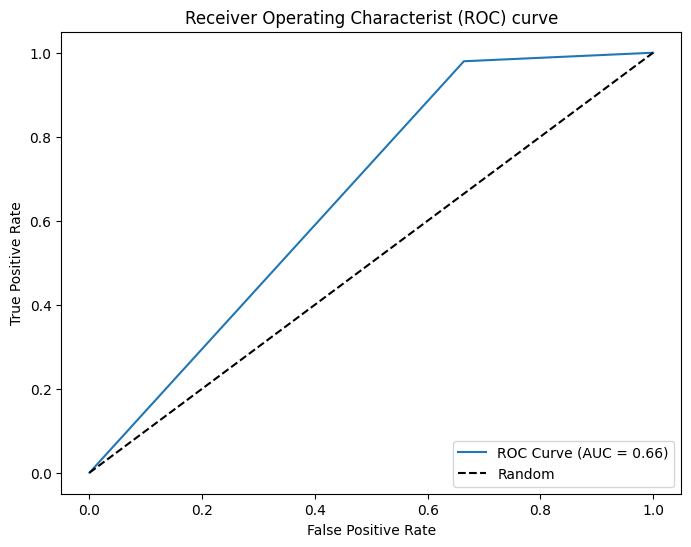

In [72]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
model = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

### Random Forest

#### Implementation of Random Forest : 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score, roc_curve

def Random_Forest(X_train, y_train, X_test, y_test):
  model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return accuracy, precision, recall, f1


#### Over sampling : 

In [84]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  ros = RandomOverSampler(random_state=42)
  X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Random_Forest(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [85]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Logistic Regression : ', accuracy_av)
print('Average Precision for Logistic Regression : ', precision_av)
print('Average Recall for Logistic Regression : ', recall_av)
print('Average F1_score for Logistic Regression : ', F1_av)

Result after over sampling the data :
Average Accuracy for Logistic Regression :  0.9410505836575875
Average Precision for Logistic Regression :  0.5817857142857144
Average Recall for Logistic Regression :  0.04443665264142122
Average F1_score for Logistic Regression :  0.08222797608840972


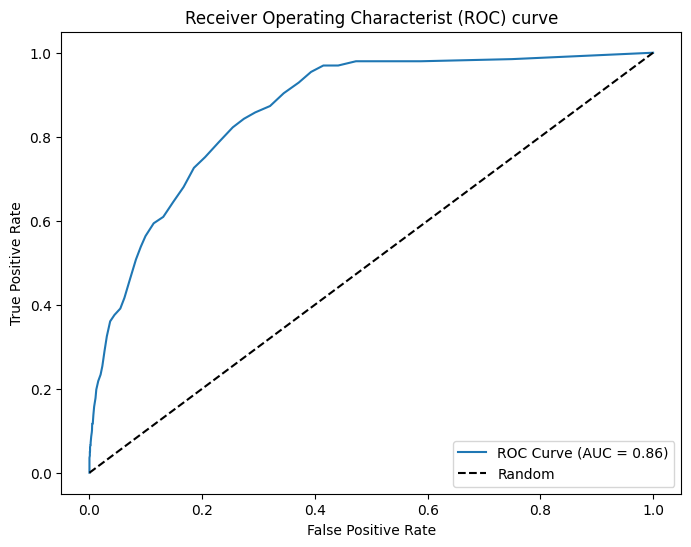

In [86]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### Under Sampling 

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  rus = RandomUnderSampler(random_state=42)
  X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Random_Forest(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [88]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Logistic Regression : ', accuracy_av)
print('Average Precision for Logistic Regression : ', precision_av)
print('Average Recall for Logistic Regression : ', recall_av)
print('Average F1_score for Logistic Regression : ', F1_av)

Result after over sampling the data :
Average Accuracy for Logistic Regression :  0.6492866407263294
Average Precision for Logistic Regression :  0.1371571562890382
Average Recall for Logistic Regression :  0.9165614773258532
Average F1_score for Logistic Regression :  0.23856089124099925


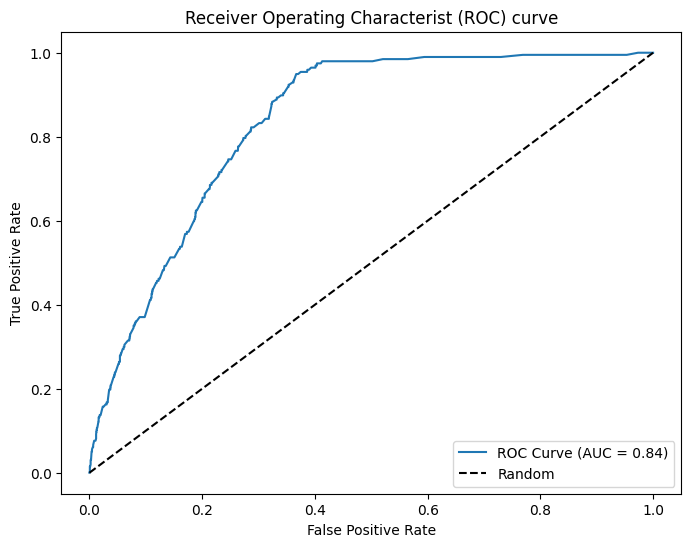

In [89]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=25, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)

#### SMOTE : 

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

n_folds = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing indices for each fold
train_indices = []
test_indices = []


for train_index, test_index in skf.split(X, y):
  train_indices.append(train_index)
  test_indices.append(test_index)

accuracies = []
precisions = []
recalls = []
f1_scores = []


# Training our model on all 10-k fold and calculate the average of the result
for fold in range(n_folds):
  X_train, y_train = X.iloc[train_indices[fold]], y[train_indices[fold]]
  X_test, y_test = X.iloc[test_indices[fold]], y[test_indices[fold]]

  # scaling our numerical data
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  smote = SMOTE(random_state=42)
  X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

  accuracy, precision, recall, f1 = Random_Forest(X_train_resample, y_train_resample, X_test, y_test)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1)

In [45]:
import numpy as np

accuracy_av = np.average(accuracies)
precision_av = np.average(precisions)
recall_av = np.average(recalls)
F1_av = np.average(f1_scores)

print('Result after over sampling the data :')
print('Average Accuracy for Logistic Regression : ', accuracy_av)
print('Average Precision for Logistic Regression : ', precision_av)
print('Average Recall for Logistic Regression : ', recall_av)
print('Average F1_score for Logistic Regression : ', F1_av)

Result after over sampling the data :
Average Accuracy for Logistic Regression :  0.9401426718547341
Average Precision for Logistic Regression :  0.5733333333333334
Average Recall for Logistic Regression :  0.01625759700794764
Average F1_score for Logistic Regression :  0.03126140864542294


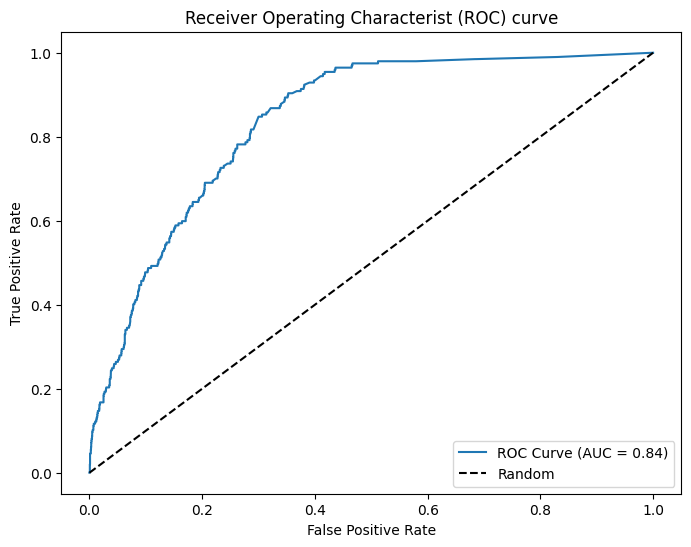

In [46]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=25, random_state=42)
model.fit(X_train_resample, y_train_resample)

plot_roc_curve(model, X_test, y_test)